# Handling Imbalanced Data with SMOTE and Near Miss Algorithm in Python


## What is imbalanced data?

- __Imbalanced Data Distribution__, generally happens when observations in _one of the class_ are much higher or lower than the other classes. 

- As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. 

- This problem is prevalent in examples such as __Fraud Detection, Anomaly Detection, Facial recognition__ etc.

## Why is it a problem?

- Standard ML techniques, such as Decision Tree and Logistic Regression, have a bias towards the __majority class__, and they tend to ignore the minority class. 

  - They tend only to predict the majority class, hence, having _major misclassification_ of the minority class in comparison with the majority class. 
  
- In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very __lesser__ recall.

  - where you end up with models with high accuracy but biased

## How to handle imbalanced data in theory?

- In general, there are two techniques: undersampling and oversampling
  - suppose we have two classes (`0: 200, 1:1000`)
  - Undersampling means down sample the majority class to match the minority class (e.g. random sample `200` out `1,000`)
  - Oversampling means up sample the minority class to match the majority class (e.g. duplicate the `200` five times to match `1,000`) 

<!--## How to handle imbalanced data in theory?-->

- Undersampling and oversampling both have their pros and cons
  - Undersampling: you lose part of your dataset, if you have a __small__ dataset, then you should not use that;
  - Oversampling: if we do _simple_ oversampling, by duplicating the data, we introduce error in the dataset
    - Emphasize on patterns that might not be truly important in the dataset

## How to handle imbalanced data in practice?

- Syntheic Minority Oversampling TEchnique (SMOTE)
  - it is an oversampling technique
  - proposed by This Nitesh Chawla, et al. in [“SMOTE: Synthetic Minority Over-sampling Technique.”](https://arxiv.org/abs/1106.1813)
- Near Miss Algorithm
  - it is an undersampling technique


## How SMOTE works?

- SMOTE works by selecting examples that are close in the feature space, 
  - drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
- It is recommended that "The combination of SMOTE and under-sampling performs better than plain under-sampling."

<!--## How SMOTE works?-->

- generates the synthetic training records by linear interpolation 
  - such as `s1-5` points below

<img src = 'https://www.researchgate.net/profile/Christina_Bogner/publication/322701982/figure/fig1/AS:586787038715904@1516912340346/Illustration-of-SMOTE-Synthetic-points-crosses-denoted-s1-through-s5-generated-by.png' alt = 'SMOTE Illustration' width="300" height="300" />

## The SMOTE Algorithm

- __Step 1__: Setting the minority class set $A$, for each $x \in A$, the __k-nearest neighbors__ of $x$ are obtained by calculating the __Euclidean distances__ between $x$ and every other sample in set $A$.
- __Step 2__: The __sampling rate__ $n$ is set according to the imbalanced proportion. For each $x \in A$, $n$ examples (i.e $x_1, x_2, …, x_n$) are randomly selected from its k-nearest neighbors, and they construct a new set $A_1$ .
- __Step 3__: For each example $x_k \in A_1$ (k=1, 2, 3…n), the following formula is used to generate a new example:
$$x' = x + rand(0, 1) \times \mid x - x_k \mid$$
in which $rand(0, 1)$ represents the random number between 0 and 1.

## SMOTE in Action

Now that we are familiar with the technique, let’s look at a worked example for an imbalanced classification problem.

We will need the Imbalanced-learn (`imblearn`) Library - which is already installed for you. If you want to install that on your own, you can do that by:
```shell
  sudo pip install imbalanced-learn
```

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
! pip install imbalanced-learn==0.5.0

In [3]:
# check version number
import imblearn
print(imblearn.__version__)

Using TensorFlow backend.


0.5.0


In [0]:
# import necessary packages  
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

#
%matplotlib inline
plt.style.use('ggplot')

### Dataset Used 

<!--The dataset consists of transactions made by credit cards. This dataset has `492` __fraud__ transactions out of `284, 807` transactions. That makes it highly unbalanced, the positive class (frauds) account for __0.172%__ of all transactions.
The dataset can be downloaded from [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).-->

In this section, we will develop an intuition for the SMOTE by applying it to an __imbalanced binary classification problem__.

First, we can use the `make_classification()` function from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to create a synthetic binary classification dataset with `50,000` examples and a `5:95` class distribution, with `15` features.

In [0]:

# define dataset
X, y = make_classification(n_samples=50000, n_features=15, n_informative = 10, n_redundant=2, n_classes=2,
	n_clusters_per_class=1, weights=[0.95], flip_y=0.3, random_state=2019) 

We can then make them into DataFrames (`feature_df` and `target_df`) to review them.

In [6]:
feature_df = pd.DataFrame(X)
feature_df.shape

(50000, 15)

In [7]:
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.203232,-0.338470,-1.942360,1.094863,0.702001,2.704392,-1.693710,-0.935677,-1.992745,-0.530799,-0.687534,-1.088979,-1.057839,-0.336629,0.661311
1,-8.515620,1.656997,-3.060870,0.475583,-0.261400,-4.327472,5.997952,-1.681292,2.224752,-1.416957,-0.138239,-0.611985,-1.068869,-0.575796,-4.186383
2,0.012205,-2.522472,1.237701,0.840568,-0.448538,0.968444,-1.525985,-2.860762,-1.597672,0.197300,-0.710927,-2.107175,0.272293,-1.423747,0.863387
3,4.329968,1.092611,-0.814243,-1.946804,-2.625136,1.245421,-3.260440,-0.412368,-1.057903,-1.162730,-0.819842,1.237197,0.226003,1.801557,1.026415
4,3.060353,1.402605,-2.949017,-0.337781,-0.198406,1.792650,0.894275,0.077573,-2.917262,-2.961037,0.453568,2.378817,-1.214751,1.896571,-0.876971


In [8]:
target_df = pd.Series(y)
target_df.shape

(50000,)

In [9]:
target_df.value_counts()

0    40730
1     9270
dtype: int64

We can plot it in a bar chart to see how much the data is imbalanced.

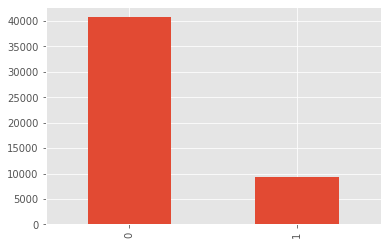

In [10]:
target_df.value_counts().plot(kind='bar');

We can also look at the `info` of the data

In [11]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
0     50000 non-null float64
1     50000 non-null float64
2     50000 non-null float64
3     50000 non-null float64
4     50000 non-null float64
5     50000 non-null float64
6     50000 non-null float64
7     50000 non-null float64
8     50000 non-null float64
9     50000 non-null float64
10    50000 non-null float64
11    50000 non-null float64
12    50000 non-null float64
13    50000 non-null float64
14    50000 non-null float64
dtypes: float64(15)
memory usage: 5.7 MB


Let's look at the descriptive statistics of the data.

In [12]:
feature_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.840012,0.004052,-1.007150,-1.005375,-0.003444,0.998727,-0.894842,-0.900989,-0.992759,-0.901772,-0.998364,0.760222,0.001682,0.900422,-0.909906
std,4.263484,0.999375,1.894039,2.063853,0.991212,1.725686,2.094143,1.365904,2.005733,2.141612,1.194688,2.513160,0.997924,1.786721,1.995354
min,-14.145078,-4.796405,-9.310272,-9.342071,-4.177785,-8.772394,-10.802910,-7.245892,-9.447663,-12.392482,-8.517993,-9.348258,-4.639400,-7.236252,-9.056560
25%,-0.029978,-0.662435,-2.283985,-2.398035,-0.678120,-0.162358,-2.318001,-1.809992,-2.339742,-2.361374,-1.774497,-0.893343,-0.670262,-0.291466,-2.261922
50%,2.837641,0.004677,-1.006449,-0.997374,-0.001286,0.993003,-0.893993,-0.955396,-0.990523,-0.915373,-1.000502,0.673951,0.002155,0.925708,-0.919781
75%,5.717328,0.674665,0.270924,0.384540,0.657904,2.150226,0.520066,-0.081549,0.357839,0.542259,-0.224397,2.303599,0.676869,2.116431,0.414218
max,20.675725,4.181346,6.529603,7.784864,4.245817,8.536446,8.634736,7.672094,7.178808,7.795812,5.918730,17.996332,4.206088,8.764451,7.238012


Let's scale te data so that all the features are in the same range.

In [13]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(feature_df))
scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-2.668632e-15,5.104500e-17,2.859133e-15,-2.752196e-15,-2.053024e-17,-7.334533e-16,7.215184e-16,7.120262e-15,-2.585159e-15,1.429845e-16,-1.482254e-15,1.115871e-15,1.263656e-17,-4.226192e-16,-7.130263e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-3.983892e+00,-4.803505e+00,-4.383861e+00,-4.039425e+00,-4.211395e+00,-5.662223e+00,-4.731370e+00,-4.645252e+00,-4.215411e+00,-5.365502e+00,-6.294284e+00,-4.022259e+00,-4.650786e+00,-4.554015e+00,-4.082852e+00
25%,-6.731628e-01,-6.669110e-01,-6.741398e-01,-6.747933e-01,-6.806646e-01,-6.728320e-01,-6.795966e-01,-6.655023e-01,-6.715730e-01,-6.815504e-01,-6.496603e-01,-6.579693e-01,-6.733488e-01,-6.670880e-01,-6.775885e-01
50%,-5.560891e-04,6.245611e-04,3.698440e-04,3.876942e-03,2.177223e-03,-3.317204e-03,4.055422e-04,-3.983282e-02,1.115045e-03,-6.350909e-03,-1.789851e-03,-3.432807e-02,4.735407e-04,1.415230e-02,-4.949101e-03
75%,6.748811e-01,6.710380e-01,6.747944e-01,6.734630e-01,6.672187e-01,6.672769e-01,6.756567e-01,5.999307e-01,6.733758e-01,6.742793e-01,6.478463e-01,6.141240e-01,6.765988e-01,6.805882e-01,6.636105e-01
max,4.183408e+00,4.179946e+00,3.979235e+00,4.259182e+00,4.286980e+00,4.367998e+00,4.550630e+00,6.276554e+00,4.074146e+00,4.061272e+00,5.789933e+00,6.858409e+00,4.213197e+00,4.401419e+00,4.083486e+00


Now to split the data into training and testing.

In [14]:
# split into 80:20 ration 
X_train, X_test, y_train, y_test = train_test_split(scaled_df.values, target_df.values, test_size = 0.2, random_state = 2019) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (40000, 15)
Number transactions y_train dataset:  (40000,)
Number transactions X_test dataset:  (10000, 15)
Number transactions y_test dataset:  (10000,)


Now train the model without handling the imbalanced class distribution.

In [15]:
# logistic regression object 
lr = LogisticRegression(max_iter=1000) 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      8149
           1       0.83      0.17      0.28      1851

    accuracy                           0.84     10000
   macro avg       0.84      0.58      0.59     10000
weighted avg       0.84      0.84      0.79     10000



The accuracy comes out to be `84%` but did you notice something strange?

The _recall_ of the minority class (`1`) in very low. It proves that the model is more biased towards majority class (`0`). So, it proves that this is not the best model.

Now, we will apply the SMOTE techniques and see the changes in the model performance.

__NOTE__: we only performs SMOTE, or any other balancing technique, on the __training__ dataset. You should __never__ touch the test data.

First, let's look at the original distribution again.


In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 7419
Before OverSampling, counts of label '0': 32581 



In [17]:
sm = SMOTE(random_state = 123) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (65162, 15)
After OverSampling, the shape of train_y: (65162,) 

After OverSampling, counts of label '1': 32581
After OverSampling, counts of label '0': 32581


Look that SMOTE Algorithm has oversampled the instances in the minority and made it equal to majority class (`32,581`). Both categories have equal amount of records. Accordingly, we see the overall size the training set increased from `32,581` to `65,162`. _Note_ that the additional `32,581` instances are synthesized and they are not in the actual data - hence, we introduce error in the dataset and then in our model.

Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

In [18]:
lr1 = LogisticRegression(max_iter=1000) 
lr1.fit(X_train_res, y_train_res) 
y_pred = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.85      0.71      0.77      8149
           1       0.25      0.43      0.32      1851

    accuracy                           0.66     10000
   macro avg       0.55      0.57      0.54     10000
weighted avg       0.74      0.66      0.69     10000



Wait, what? We see a huge descrease in model accuracy from `84%` to `66%`. Nobody likes that kind of drop, correct?

That is simply not true. When we had `84%` as the accuracy of the initial model, we are comparing against a threshold of `95%`. Why? 

Since if we assign all the instances in the testing set to the majority class (`0`), or simply by __random guessing__, we get an accuracy of `95%`. In that sense, our model is <span style="color:red"> __11% worse__ </span> than random guessing. Clearly that is not a good model.

Now let's look at the modeling results after resampling. We are comparing against the threshold of `50%` (random guessing, since we have equal amounts of instances in the two classes). Thus, we result in a <span style="color:blue"> __16% increase__ </span> by applying SMOTE. Also, we notice that the recall in the minority class increased by `0.26`, which means our new model is more capable of capturing the pattern(s) in the minority class.

SMOTE clearly works in our favor. But still, we introduced error in our dataset, you can observe that in the declined performance in the results toward the majority class.

That is why we need to try the NearMiss (undersampling) method.

## How NearMiss works?

- NearMiss is an under-sampling technique. It aims to balance class distribution by __randomly eliminating__ majority class examples. 

- To prevent problem of information loss in most under-sampling techniques, __near-neighbor__ methods are widely used.

- The basic intuition about the working of near-neighbor methods is as follows:

  - __Step 1__: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, __majority class__ is to be under-sampled.
  - __Step 2__: Then, $n$ instances of the majority class that have the __smallest distances__ to the minority class are selected.
  - __Step 3__: If there are $k$ instances in the minority class, the nearest method will result in $k \times n$ instances of the majority class.

Key difference to SMOTE: NearMiss works on both the majority and minority classes, where as SMOTE only works on the minority class.

<!-- # How NearMiss works? -->
- For finding $n$ closest instances in the majority class, there are several variations of applying NearMiss Algorithm :

  - Version 1: It selects samples of the majority class for which _average_ distances to the $k$ __closest__ instances of the minority class is _smallest_.
  - Version 2: It selects samples of the majority class for which _average_ distances to the $k$ __farthest__ instances of the minority class is _smallest_.
  - Version 3: It works in 2 steps. 
    - Firstly, for each minority class instance, their $M$ nearest-neighbors will be stored. 
    - Secondly, the majority class instances are selected for which the average distance to the $N$ nearest-neighbors is the _largest_.

Let's look at the original class distribution again.

In [19]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before Undersampling, counts of label '1': 7419
Before Undersampling, counts of label '0': 32581 



In [20]:
# apply near miss 

nr = NearMiss(random_state=123) 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

After Undersampling, the shape of train_X: (14838, 15)
After Undersampling, the shape of train_y: (14838,) 

After Undersampling, counts of label '1': 7419
After Undersampling, counts of label '0': 7419


The NearMiss Algorithm has undersampled the majority instances and made it equal to majority class. Here, the majority class has been reduced to the total number of minority class (`14,838`), so that both classes will have equal number of records. __Note__ that by doing so, we lost $ 32,581 - 14,838 = 17,743 $ intances in the majority class. Hence, we will observe a loss in the model performance.

Let's check out the modeling results after applying the NearMiss technique on the data.

In [21]:
# train the model on train set 
lr2 = LogisticRegression(max_iter=1000) 
lr2.fit(X_train_miss, y_train_miss) 
y_pred = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      8149
           1       0.25      0.46      0.32      1851

    accuracy                           0.64     10000
   macro avg       0.55      0.57      0.54     10000
weighted avg       0.74      0.64      0.67     10000



Similarly, we observe a decline in the modeling performance (e.g. acc: `84%` -> `64%`). But using the same logic as we analyzing the SMOTE results, we know that now we have an edge of $+14\%$ over random guessing. 

In addition, by comparing the SMOTE and NearMiss results, we know that the SMOTE leads to better results - it is because we did not lose much data as we do in the NearMiss scenario. Thus, we can go with the SMOTE technique here.

## Conclusion

Now we understand how oversampling (__SMOTE__) and undersampling (__NearMiss__) work, and how do we use them in balancing the imbalanced dataset. 

They both have their own pros and cons, so you should choose them wisely. Additionally, researchers and data scientists are working on merging the two, or in general oversampling and undersampling together, to battle with imbalanced datasets. If you are interested, please [let me know](mailto:jtao@fairfield.edu).

## References

1. [Imbalance-Learn examples](http://glemaitre.github.io/imbalanced-learn/auto_examples/index.html)
2. [ML | Handling Imbalanced Data with SMOTE and Near Miss Algorithm in Python](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)
3. [SMOTE Oversampling for Imbalanced Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
4. [Survey of resampling techniques for improving classification performance in unbalanced datasets - research article](https://arxiv.org/pdf/1608.06048.pdf)
5. [Undersampling Algorithms for Imbalanced Classification](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)